In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
features = pd.DataFrame(boston.data, columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns=["TARGET"])

In [6]:
data = pd.concat([features, target], axis = 1)

In [7]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [8]:
correlation = data.corr("pearson")

In [9]:
abs(correlation["TARGET"].sort_values())

LSTAT      0.737663
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
TARGET     1.000000
Name: TARGET, dtype: float64

In [30]:
W = data["CRIM"]
X = data["RM"]
Y = data['TARGET']
Z = data["LSTAT"]

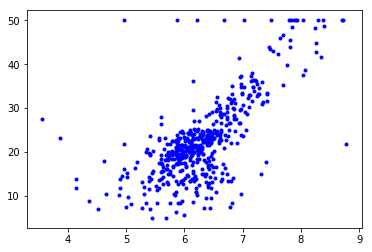

In [31]:
plt.plot(X,Y,'b.')

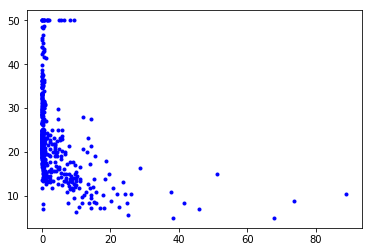

In [32]:
plt.plot(W,Y,'b.')

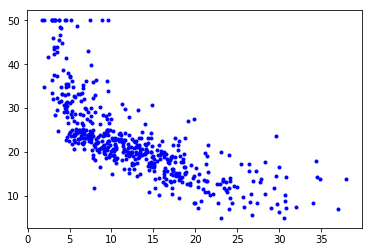

In [33]:
plt.plot(Z,Y,'b.')

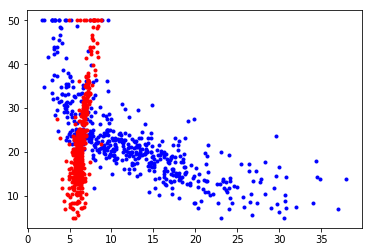

In [34]:
plt.plot(Z,Y,'b.',X,Y,'r.')

In [35]:
X =(X-X.min())/(X.max()-X.min())
Y =(Y-Y.min())/(Y.max()-Y.min())
Z =(Z-Z.min())/(Z.max()-Z.min())

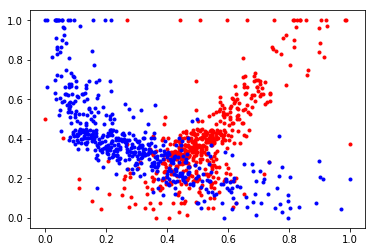

In [36]:
plt.plot(X,Y,'r.',Z,Y,"b.")

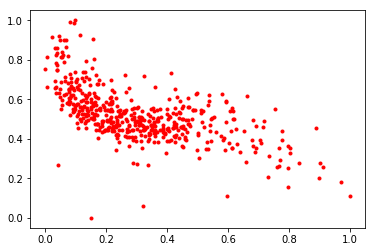

In [37]:
plt.plot(Z,X,'r.')

In [38]:
x = np.array(X)
y = np.array(Y)
z = np.array(Z)

In [39]:
x_train, x_test, z_train, z_test, y_train, y_test = train_test_split(x,z,y,test_size = 0.2)

In [40]:
x_train.size

404

In [86]:
def hypothesis(a,x,z,b,c):
    return (a*x + np.exp(-z*b) + c)

In [87]:
def error(a,x,z,b,c,y):
    e = 0
    m = len(x)
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],z[i],b,c) - y[i]), 2)
    return (1/(2*m))*e  

In [88]:
def step_gradient(a,x,z,b,c,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x)
    
    for i in range(m):
        grad_a += (1/m) * (hypothesis(a,x[i],z[i],b,c) - y[i]) * x[i]
        grad_b += (1/m) * (hypothesis(a,x[i],z[i],b,c) - y[i]) * np.exp(-z[i]*b) * -z[i]
        grad_c += (1/m) * (hypothesis(a,x[i],z[i],b,c) - y[i])
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    c = c - grad_c * learning_rate
    
    return a,b,c

In [89]:
def descend(init_a, x, z, init_b, init_c, y, learning_rate, iterations):
    a = init_a
    b = init_b
    c = init_c
    
    for i in range(iterations):
        e = error(a,x,z,b,c,y)
        
        if i % 1000 == 0:
            print(f"Error: {np.sqrt(e)}, a:{a}, b:{b}, c:{c}")
            
        a,b,c = step_gradient(a,x,z,b,c,y,learning_rate)
    return a,b,c    

In [92]:
# final_a =0
# final_b = 1
# final_c =1
learning_rate = 0.01
iterations = 10000

In [93]:
final_a,final_b,final_c = descend(final_a,x_train,z_train,final_b,final_c,y_train,learning_rate,iterations)

Error: 0.08799154219933802, a:0.07375918743594578, b:1.417644131636908, c:-0.32159364847408045
Error: 0.08758403715206027, a:0.09745095599625002, b:1.4189320619672863, c:-0.33388725221045396
Error: 0.08727561657869934, a:0.1179483270758563, b:1.4186722430482952, c:-0.3447547914484579
Error: 0.08703866348255011, a:0.13574266962133347, b:1.4171179498432458, c:-0.35441304142231356
Error: 0.08685324138282358, a:0.1512489768583276, b:1.4144802021490221, c:-0.3630458747137831
Error: 0.08670498299305089, a:0.164818071982603, b:1.4109356376730982, c:-0.37080922394361837
Error: 0.08658354865652493, a:0.17674674313362881, b:1.4066327050144078, c:-0.37783529372961083
Error: 0.0864815060646263, a:0.18728619604622335, b:1.4016965896580673, c:-0.38423613620225994
Error: 0.08639351876622106, a:0.1966491289865862, b:1.3962331709217657, c:-0.39010668703646517
Error: 0.08631575965643463, a:0.20501567195941897, b:1.390332228157295, c:-0.39552734408277185


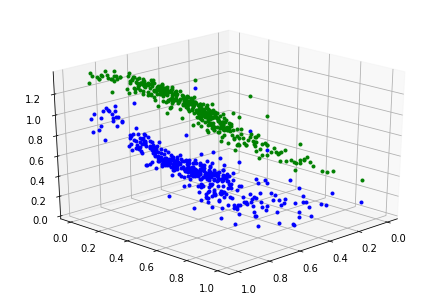

In [85]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(25,45)
ax.plot(x_train,z_train,y_train,"b.")
ax.plot(x_train,z_train,hypothesis(final_a,x_train,z_train,final_b,final_c),"g.")



#ax.plot(y_train,x_train,hypothesis(final_a,x_train,z_train,final_b,final_c),c="g")
# ax.set_xlabel('x')
# ax.set_ylabel('z')
# ax.set_zlabel('y')


         

In [93]:
final_a,final_b,final_c

(0.7273575946195661, 0.46864094349560254, 0.15042526254896144)

In [94]:
hypothesis(final_a,x_test[:3],z_test[:3],final_b,final_c)

array([0.47527456, 0.33516628, 0.33860518])

In [95]:
y_test[:3]

array([0.43555556, 0.26666667, 0.26      ])